# Machine Learning 2024-I
Uniquindio

Docente: Jonnatan Arias Garcia

#Imports

Carguemos librerias para visualizar los datos en rejilla

In [16]:
%matplotlib inline
import ipywidgets as ipy
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from matplotlib.patches import Rectangle
import seaborn as sns; sns.set()
import pandas as pd
from sklearn.linear_model import LinearRegression

<ipython-input-16-d31e2c588eb9>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


### Generación de datos
El siguiente bloque define tres bases de datos. En cada caso, el parámetro sigma controla el nivel ruido.

In [17]:
def sistema1(x,sigma = 0.5):
  a = 0.5
  b = 1
  y = a*x + b
  e = sigma*np.random.randn(y.shape[0],y.shape[1])
  t = y + e
  return t

def sistema2(x,sigma = 0.05):
  a = 0.001
  b = 1
  y = a*pow(x-2,3)+b
  e = sigma*np.random.randn(y.shape[0],y.shape[1])
  t = y + e
  return t

def sistema3(x,sigma=1):
  a = 0.001
  b = 0.01
  c = 0.1
  d = 5
#  y = a*np.sin(x)/x
  y = a*x**3 + b*x**2 + c*x + d
  e = sigma*np.random.randn(y.shape[0],y.shape[1])
  t = y + e
  return t,y

El siguiente bloque define funciones para graficar el resultado de los modelos construidos

In [18]:
def plot_linear(input,target,predicted):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.scatter(input, target,  label='data')
  plt.plot(input, predicted, color='red',label='predicted')
  plt.xlabel('Input variable ($x$)')
  plt.ylabel('Output variable ($t$)')
  plt.legend()

  plt.subplot(1,2,2)
  plt.scatter(target, predicted)
  plt.plot([min(target),max(target)],[min(target),max(target)])
  plt.xlabel('Target ($t$)')
  plt.ylabel('Predicted ($y$)')
  plt.axis('equal')
  plt.xlim([min(target),max(target)])
  plt.ylim([min(target),max(target)])
  plt.show()

def plot_train_test(x_train,t_train,y_train,x_test,y_test):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.scatter(x_train, t_train, label="Train data")
  plt.plot(x_test, y_test, color='red', label="Predicted test")
  plt.ylim([min(t_train),max(t_train)])
  plt.legend()

  plt.subplot(1,2,2)
  plt.scatter(t_train, y_train)
  plt.plot([min(t_train),max(t_train)],[min(t_train),max(t_train)])
  plt.xlabel('Target ($t$)')
  plt.ylabel('Predicted ($y$)')
  plt.axis('equal')
  plt.xlim([min(t_train),max(t_train)])
  plt.ylim([min(t_train),max(t_train)])
  plt.show()

def plot_train_test_G(x_train,t_train,y_train,x_test,t_test,y_test,d):
  plt.figure(figsize=(5,5))

  plt.scatter(x_train, t_train, label="Train data")
  plt.plot(x_test, t_test, color='green', label="Noise free test data")
  plt.plot(x_test, y_test, color='red', label="Predicted test")
  plt.legend()
  plt.title('Degree {0}'.format(d))
  plt.show()

def plot_mse(w0, w1, X, t ):                                                    #Se crea la función que construye las gráficas.
    fig, ax = plt.subplots(1)
    y = linear_1d_predict(X,np.array([w0,w1]).reshape(-1,1))

    plt.scatter(X,t,label='Data')
    plt.scatter(X,y,label='Prediction')

    ca = plt.gca()
    for xi,ti,yi in zip(X,t,y):
        ca.add_patch(Rectangle((xi,min(ti,yi)),np.abs(ti-yi),np.abs(ti-yi),edgecolor='k',fill=None))

    plt.legend()
    plt.axis('equal')
    plt.xlabel('Input ($x$)')
    plt.ylabel('Output')
    plt.title('MSE : {}'.format(compute_mse(t,y)))
    plt.show()

El siguiente bloque define un arreglo de valores con distribución uniforme ($x$) y calcula la salida del sistema uno ($t$) para cada valor

X: (50, 1) t: (50, 1)
Number of samples: 50


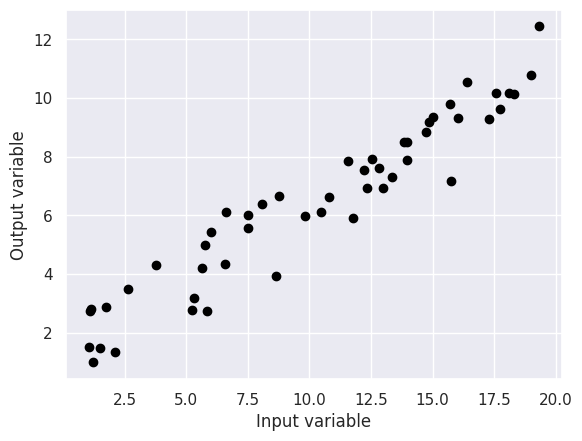

In [20]:
N = 50 # número de muestras a generar
x_init = 0
x_end = 20
X_train = np.random.uniform(x_init,x_end,(N,1))

t_train = sistema1(X_train,sigma=1)
print('X:',X_train.shape,'t:',t_train.shape)
print('Number of samples:',t_train.shape[0])

plt.scatter(X_train, t_train,  color='black')
plt.xlabel('Input variable')
plt.ylabel('Output variable')
plt.show()

#Modelo regresion lineal I

El modelo de regresión lineal descrito en clase para construir $y(x)=w_1x+w_0$.

*   Visto de forma compacta $\mathbf{y}=\mathbf{\Phi}\mathbf{w}$ y $\mathbf{\Phi}=[1 | \mathbf{X}]$


In [21]:
def linear_1d_predict(X,w):
  ones = np.ones(X.shape)
  phi = np.concatenate((ones, X), axis=1)
  y = phi @ w  #@ denota producto matricial
  return y

El error cuadratico medio como metrica de evaluación.

In [22]:
def compute_mse(t,y):
  e = t-y
  mse = e.T @ e
  return mse.ravel()[0] #ravel obliga a que sea un vector

#Nosotros damos el w
Sabemos que el modelo debe ir buscando valores de w cosa que quede bien ajustado. seamos nostros los que variamos el w.

In [25]:
update = lambda  w0,w1 : plot_mse(w0, w1, X_train, t_train)

display(ipy.interactive(                                                        #Se crea el tablero
    update,
    w0=ipy.FloatSlider(value=0, min=-10, max=10, step=0.1,
                    description='Bias w_0:',
                    continuous_update=True),
    w1=ipy.FloatSlider(value=1, min=-10, max=10, step=0.1,
                    description='Slope w_1:',
                    continuous_update=True,
                    style=dict(description_width='initial')),
))

interactive(children=(FloatSlider(value=0.0, description='Bias w_0:', max=10.0, min=-10.0), FloatSlider(value=…

#Calculemos w  (por maxima verosimilitud)

La conclusión por maxima verosimilitud es:
 $\mathbf{w}_{ML}=\mathbf{\Phi}^{+} \mathbf{t}$


¿Su regresion se ajusta bien a sus datos?

w es: [[1.41722828]
 [0.49115741]]


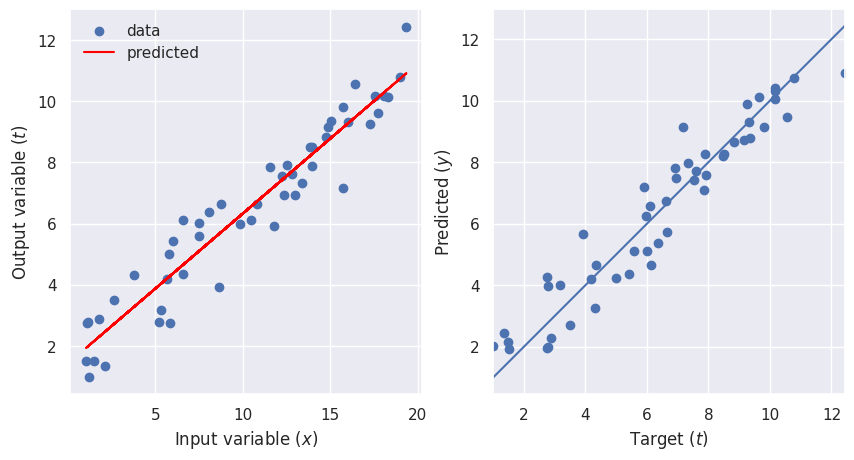

In [31]:
def linear_1d_fit(X,t):
  w = np.array(0)
  Phi = np.concatenate((np.ones((X.shape[0],1)),X),axis=1)
  w = np.linalg.pinv(Phi)@t
  return w


#Train the model
w = linear_1d_fit(X_train,t_train)
print('w es:',w)

#Predict with the model
y_own = linear_1d_predict(X_train,w)

plot_linear(X_train,t_train,y_own)

# Conozcamos la libreria sklearn


Apliquemos la regresion lineal para los mismos datos

In [32]:
from sklearn.linear_model import LinearRegression

w: [[0.49115741]]
w_0: [1.41722828]
R2: 0.9163561284466554


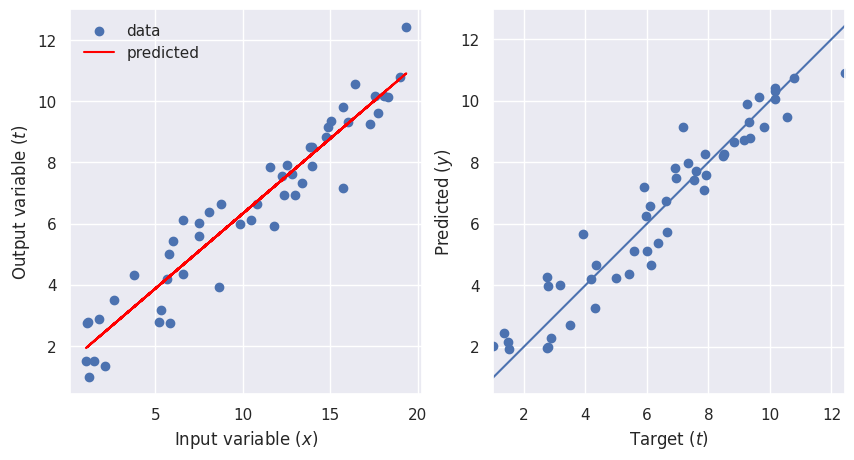

In [34]:
regr = LinearRegression()
regr.fit(X_train, t_train)
y_sk = regr.predict(X_train)

w_sk = regr.coef_
w0_sk = regr.intercept_
score = regr.score(X_train, t_train)

print('w:',w_sk)
print('w_0:',w0_sk)
print('R2:',score)

plot_linear(X_train,t_train,y_sk)

Creemos nuevos datos con otra distribución

X_train: (50, 1) t_train: (50, 1)


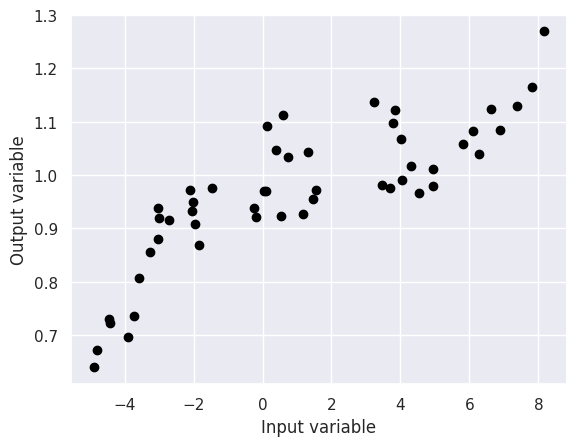

In [35]:
X_train = np.sort(np.random.uniform(-5,10,(50,1)),axis=0)
t_train = sistema2(X_train)
print('X_train:',X_train.shape,'t_train:',t_train.shape)
plt.scatter(X_train,t_train,color='black')
plt.xlabel('Input variable')
plt.ylabel('Output variable')
plt.grid(True)
plt.show()

Miremos el ajuste lineal basico

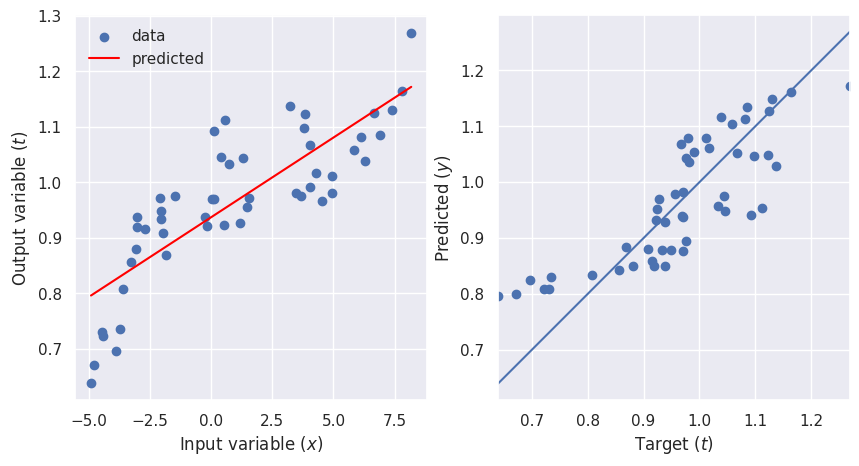

In [36]:
regr = LinearRegression()
regr.fit(X_train, t_train)
y_lineal = regr.predict(X_train)
plot_linear(X_train,t_train,y_lineal)

Que opinan?

In [37]:
score = regr.score(X_train, t_train)
print('R2:',score)

R2: 0.6846295621563261


y si probamos con una polinomica?

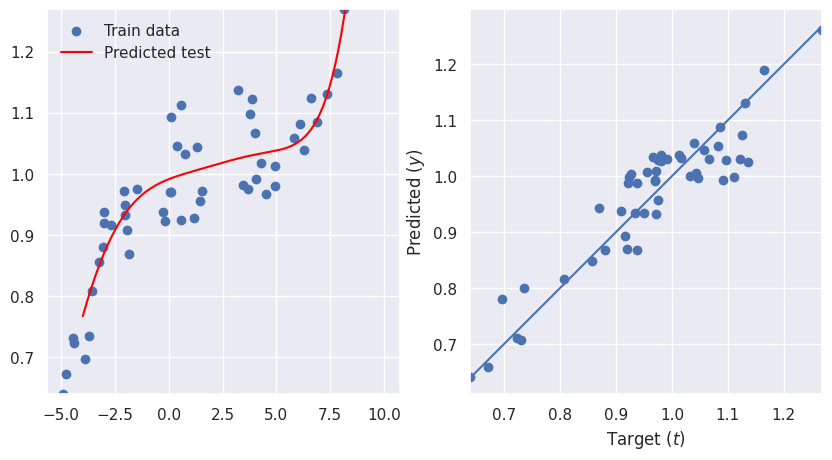

In [38]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(6)
Phi_train = poly.fit_transform(X_train)
regr = LinearRegression()
regr.fit(Phi_train, t_train)


#ceamos datos entrada de prueba:
X_test = np.linspace(-4,10,200).reshape(-1,1)


Phi_test = poly.fit_transform(X_test)
y_train = regr.predict(Phi_train)


y_test = regr.predict(Phi_test)

plot_train_test(X_train,t_train,y_train,X_test,y_test)

Existen tambien funciones de base radial
(RBF) como funciones base  $\phi_p(x)=\exp(-(x-\mu_p)^2/(2\sigma^2))$
(`sklearn.metrics.pairwise.rbf_kernel` y `sklearn.preprocessing.FunctionTransformer`)

* Los centroides van en la variable `mu`.

* ¿Cómo afecta la cantidad de centroides el resultado de la regresión?
* ¿Cómo afecta el parámetro escala ($\sigma$) el resultado de la regresión?  

* ¿Escogería funciones polinomiales o funciones de base radial (RBF) para este modelo de regresión?

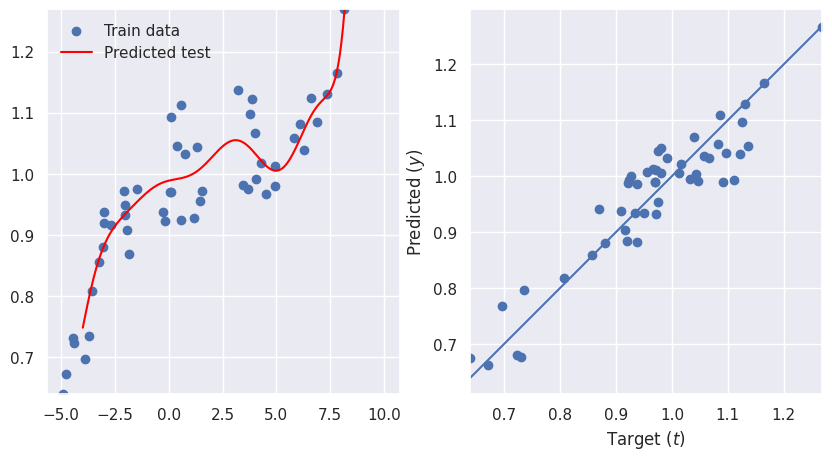

In [39]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.preprocessing import FunctionTransformer

def rbf(X):
  mu = np.linspace(-5, 10, 10).reshape(-1, 1)
  sigma = 4
  gamma = 1/(2*sigma**2)
  return rbf_kernel(X, mu, gamma)

transf = FunctionTransformer(rbf)


Phi_train = transf.transform(X_train)

#A continuación se crea una malla linealmente espaciada como datos de entrada de prueba:
X_test = np.linspace(-4,10,200).reshape(-1,1)

Phi_test = transf.transform(X_test)

Phi_train = transf.transform(X_train)
mdl = LinearRegression().fit(Phi_train,t_train)

y_train = mdl.predict(Phi_train)


y_test = np.zeros((X_test.shape[0],1))

Phi_test = transf.transform(X_test)

y_test = mdl.predict(Phi_test)
#%%
plot_train_test(X_train,t_train,y_train,X_test,y_test)

#Tarea

Para el sistema restante, aplique regresor usando sklearn:
regresor lineal,
regresor polinomico de diferentes grados y
rbf.

Fundamentenos sus conclusiones sobre que modelo eligiria y porque?



X_train: (100, 1) t_train: (100, 1)
Number of samples: 100


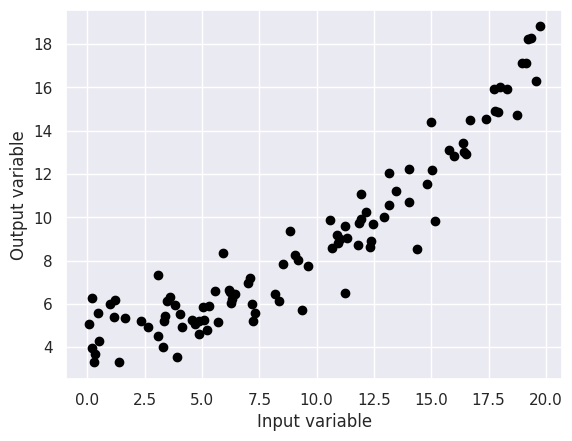

In [40]:
N = 100 # número de muestras a generar
x_init = 0
x_end = 20
X_train = np.random.uniform(x_init,x_end,(N,1))

t_train,_ = sistema3(X_train)
print('X_train:',X_train.shape,'t_train:',t_train.shape)
print('Number of samples:',t_train.shape[0])

plt.scatter(X_train, t_train,  color='black')
plt.xlabel('Input variable')
plt.ylabel('Output variable')
plt.grid(True)
plt.show()

#datos x_train t_train